<a href="https://colab.research.google.com/github/saharCoder/MachineLearning/blob/main/LinearModels_pengiun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
! mkdir ~/.kaggle
! cp /content/gdrive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download larsen0966/penguins
! unzip penguins.zip

Mounted at /content/gdrive
  0% 0.00/3.78k [00:00<?, ?B/s]
100% 3.78k/3.78k [00:00<00:00, 10.9MB/s]
Archive:  penguins.zip
  inflating: penguins.csv            


# The Contexts:
Finding the body mass to evaluate thier feeding

### Importing

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt

In [3]:
#dataset from seaborn:
#df=sns.load_dataset("penguins")
df=pd.read_csv('penguins.csv')

In [4]:
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
#dropping unneeded variable
df.drop('Unnamed: 0',axis=1,inplace=True)

### Taking a quick look at the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


-- we have 3 string "discrete" variables and 5 Continous variables, since we are dealing with linear regression model, then we need to focus on the continous variables

In [8]:
print("The number of observation in the dataset: ",df.shape[0]," And there are ",df.shape[1]," Columns")

The number of observation in the dataset:  344  And there are  8  Columns


In [10]:
features=list(df.columns)
features

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex',
 'year']

* Continouse Variables:
1. bill_length_mm
2. bill_depth_mm
3. flipper_length_mm
4. body_mass_g

### Cleaning the Data

#### Missing data


In [11]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [13]:
print("Total Missing values accross all the columns: ",df.isnull().sum().sum())

Total Missing values accross all the columns:  19


In [14]:
[features for features in df.columns if df[features].isnull().sum()>0]

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

-- There are several columns that have missing values

In [15]:
#Handle the missing data: either by rows or by columns
df_null=df[df.isnull().any(axis=1)]

In [16]:
df_null.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007


In [18]:
print('There are ',df_null.shape[0]," Total missing rows in the dataset")

There are  11  Total missing rows in the dataset


In [19]:
df_total=df.size
print("The size of the original dataset: ",df_total)

The size of the original dataset:  2752


In [20]:
dfnull_total=df_null.size
print("The size of the Null dataset: ",dfnull_total)

The size of the Null dataset:  88


In [21]:
count_dropna_rows = df.dropna().size
count_dropna_rows

2664

In [22]:
count_dropna_columns = df.dropna(axis=1).size
count_dropna_columns

1032

In [23]:
# Print the percentage of values removed by dropping rows,columns.

print('By Rows: ',count_dropna_rows/df_total*100)


print("By Columns: ",count_dropna_columns/df_total*100)

By Rows:  96.80232558139535
By Columns:  37.5


In [24]:
#the drop by row is better:
df=df.dropna()

In [25]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

#### Handling Outliers


In [33]:
def skeweness(column):
   mean=np.mean(df[column])
   median=np.median(df[column])
   print("The mean: ",mean)
   #calculating the median
   print("The median: ",median)
   if mean>median:
     print('The data more likely to be skewed to the RIGHT!')
   else:
     print('The data more likely to be skewed to the LEFT!')

In [39]:
# Helper function to plot histograms based on the
# format of the `sessions` histogram
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    fig, ax = pt.subplots(figsize=(5, 4))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    pt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha="left", va="top", transform=ax.transAxes)
    else:
        print('Median:', median)
    pt.title(f'{column_str} histogram');


In [40]:
def boxplotter(column,xlabel,title): # Box plot
  fig, ax = pt.subplots(figsize=(5, 4))
  box = sns.boxplot(x=df[column])
  g = pt.gca()
  #box.set_xticklabels(np.array([readable_numbers(x) for x in g. 􏰀→get_xticks()]))
  pt.xlabel(xlabel)
  pt.title(title)
  pt.show()

* bill_length_mm

In [34]:
skeweness('bill_length_mm')

The mean:  43.9927927927928
The median:  44.5
The data more likely to be skewed to the LEFT!


- The mean and the median are close together, then the middle value in the data set, when arranged in ascending order, resembles the balancing point in the data and that occurs at the average. Then we say that the data set has a symmetrical distribution.





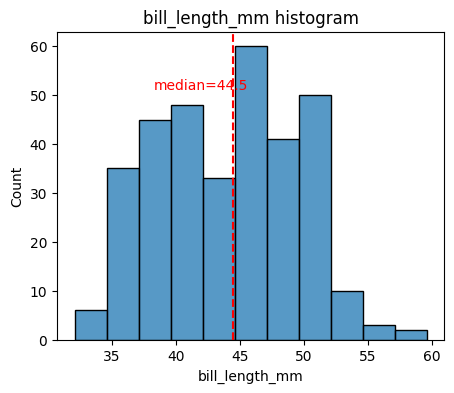

In [41]:
histogrammer('bill_length_mm', median_text=True)

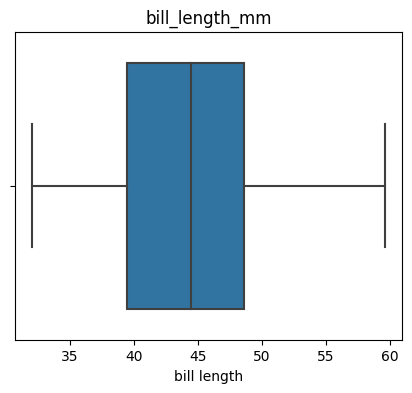

In [43]:
boxplotter('bill_length_mm','bill length','bill_length_mm')

* bill_depth_mm

In [45]:
skeweness('bill_depth_mm')

The mean:  17.164864864864867
The median:  17.3
The data more likely to be skewed to the LEFT!


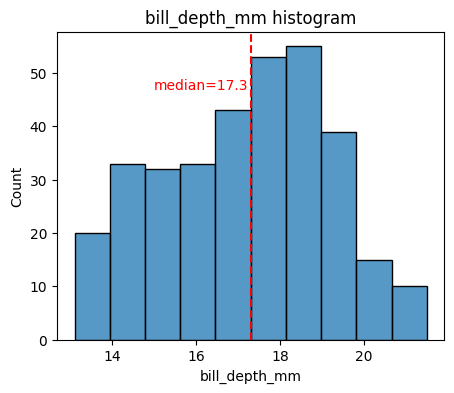

In [46]:
histogrammer('bill_depth_mm', median_text=True)

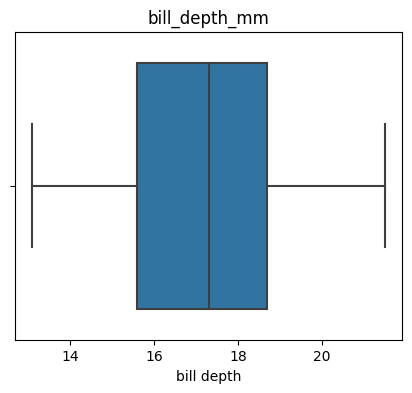

In [44]:
boxplotter('bill_depth_mm','bill depth','bill_depth_mm')

* flipper_length_mm

In [47]:
skeweness('flipper_length_mm')

The mean:  200.96696696696696
The median:  197.0
The data more likely to be skewed to the RIGHT!


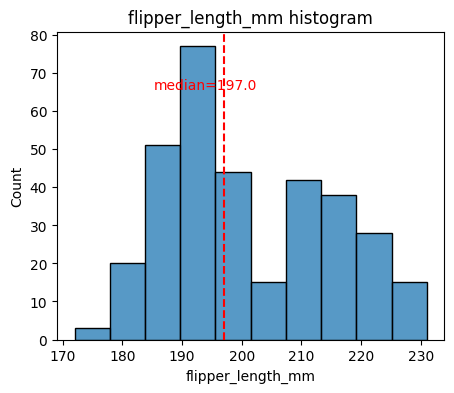

In [48]:
histogrammer('flipper_length_mm', median_text=True)

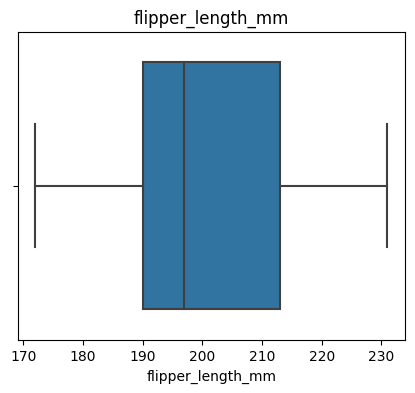

In [49]:
boxplotter('flipper_length_mm','flipper_length_mm','flipper_length_mm')

* body_mass_g

In [50]:
skeweness('body_mass_g')

The mean:  4207.057057057057
The median:  4050.0
The data more likely to be skewed to the RIGHT!


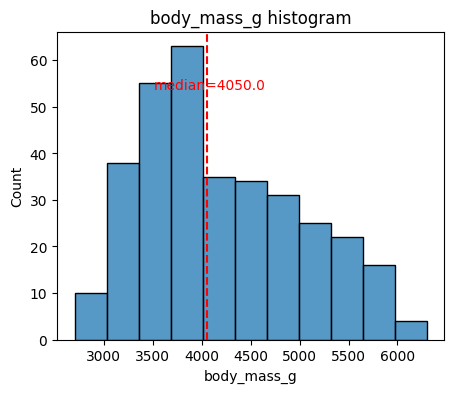

In [51]:
histogrammer('body_mass_g', median_text=True)

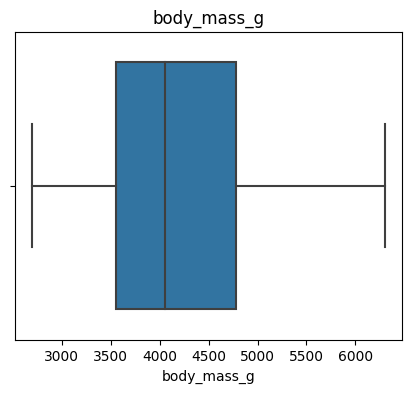

In [52]:
boxplotter('body_mass_g','body_mass_g','body_mass_g')

- There visualizations indicate that there are no outliers detected across the numerical variables

### Model Distribution

In [53]:
#Checkung whether or not the data fit into the Empirical Rule of ditribution
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [54]:
mean_df=df['body_mass_g'].mean()
std_df=df['body_mass_g'].std()

In [59]:
#One std
lowerlimit=mean_df-1*std_df
upperlimit=mean_df+1*std_df
print('The precentage of data that fall within the lower and upper limit with one std',((df['body_mass_g']>=lowerlimit) & (df['body_mass_g']<= upperlimit)).mean()*100)

The precentage of data that fall within the lower and upper limit with one std 64.86486486486487


In [60]:
#Two std
lowerlimit=mean_df-2*std_df
upperlimit=mean_df+2*std_df
print('The precentage of data that fall within the lower and upper limit with two std',((df['body_mass_g']>=lowerlimit) & (df['body_mass_g']<= upperlimit)).mean()*100)

The precentage of data that fall within the lower and upper limit with two std 97.2972972972973


In [61]:
#Three std
lowerlimit=mean_df-3*std_df
upperlimit=mean_df+3*std_df
print('The precentage of data that fall within the lower and upper limit with three std',((df['body_mass_g']>=lowerlimit) & (df['body_mass_g']<= upperlimit)).mean()*100)

The precentage of data that fall within the lower and upper limit with three std 100.0


<Axes: >

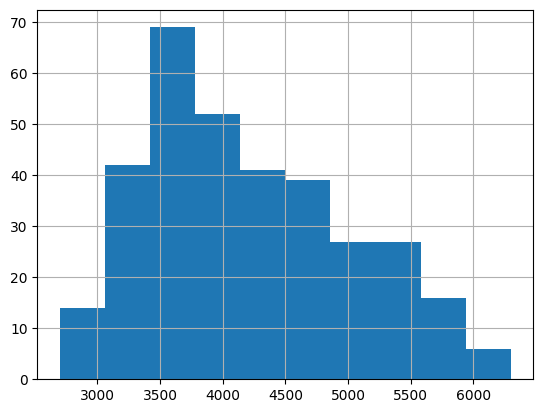

In [62]:
df['body_mass_g'].hist()

- This showed that data in body_mass_g does not fit the empirical rule

<Axes: >

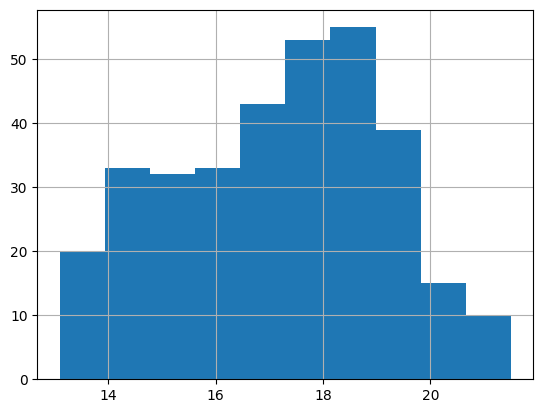

In [63]:
df['bill_depth_mm'].hist()

In [64]:
mean_df=df['bill_depth_mm'].mean()
std_df=df['bill_depth_mm'].std()

#One std
lowerlimit=mean_df-1*std_df
upperlimit=mean_df+1*std_df
print('The precentage of data that fall within the lower and upper limit with one std',((df['bill_depth_mm']>=lowerlimit) & (df['bill_depth_mm']<= upperlimit)).mean()*100)

#Two std
lowerlimit=mean_df-2*std_df
upperlimit=mean_df+2*std_df
print('The precentage of data that fall within the lower and upper limit with two std',((df['bill_depth_mm']>=lowerlimit) & (df['bill_depth_mm']<= upperlimit)).mean()*100)


#Three std
lowerlimit=mean_df-3*std_df
upperlimit=mean_df+3*std_df
print('The precentage of data that fall within the lower and upper limit with three std',((df['bill_depth_mm']>=lowerlimit) & (df['bill_depth_mm']<= upperlimit)).mean()*100)

The precentage of data that fall within the lower and upper limit with one std 63.96396396396396
The precentage of data that fall within the lower and upper limit with two std 98.49849849849849
The precentage of data that fall within the lower and upper limit with three std 100.0


### Catogrical Data Exploration & Visualization

In [65]:
#view catogrical data
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

<Axes: >

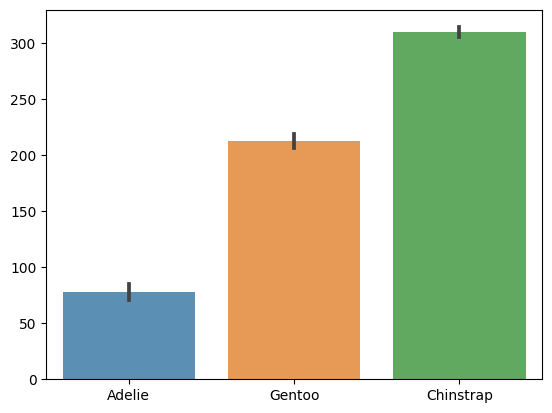

In [74]:
sns.barplot(x=df['species'].values, y=df['species'].index, alpha=0.8)

<Axes: >

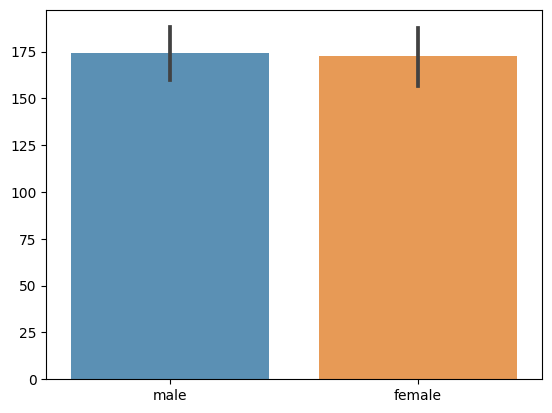

In [75]:
sns.barplot(x=df['sex'].values, y=df['sex'].index, alpha=0.8)

<Axes: >

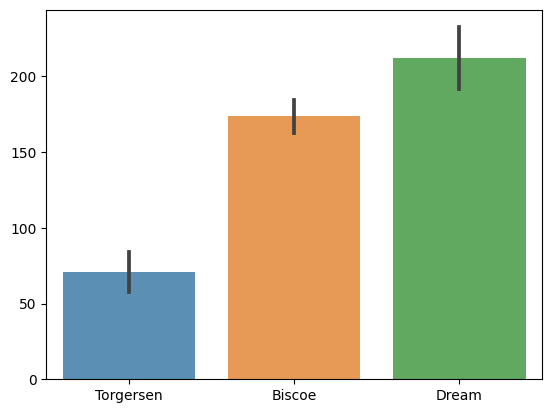

In [76]:
sns.barplot(x=df['island'].values, y=df['island'].index, alpha=0.8)

<Axes: >

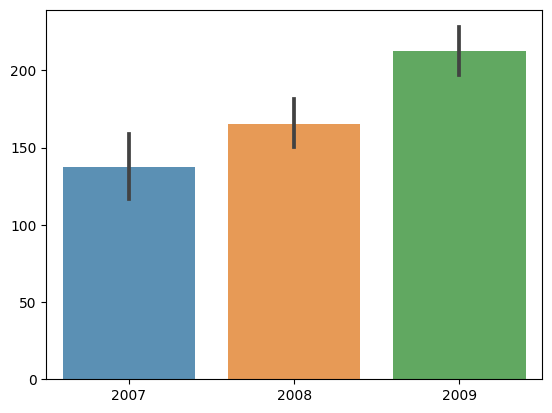

In [77]:
sns.barplot(x=df['year'].values, y=df['year'].index, alpha=0.8)

### Building the Linear model

In [87]:
features

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex',
 'year']

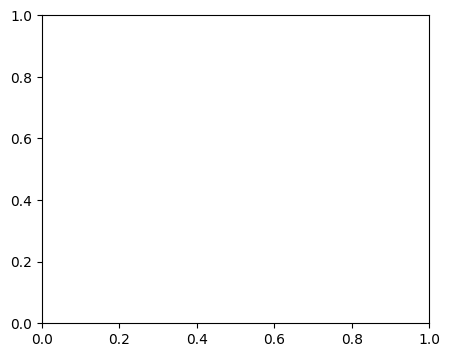

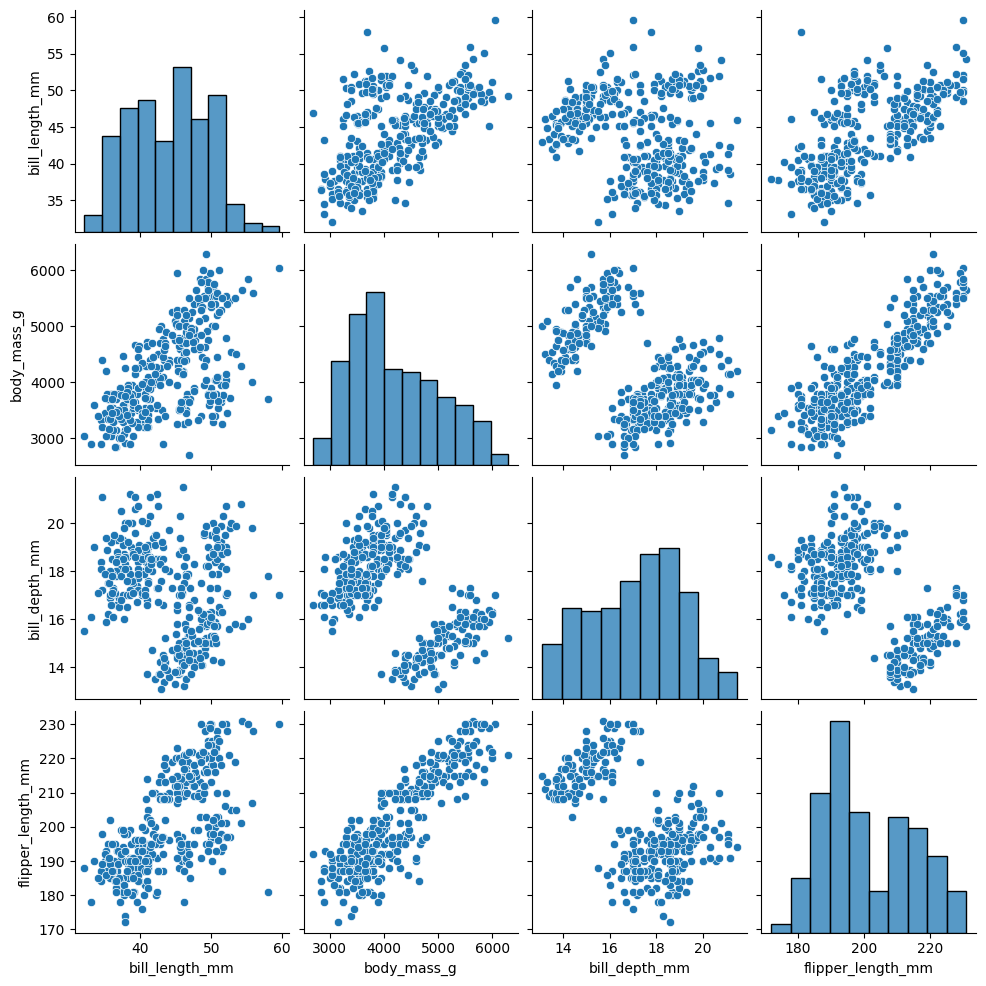

In [125]:
#PairPlots:
fig, ax = pt.subplots(figsize=(5, 4))
sns.pairplot(df,vars=['bill_length_mm', 'body_mass_g','bill_depth_mm','flipper_length_mm'])
pt.show()

- this shows that there is a linearity assumptions between the body mass and the flipper length variables

In [79]:
# Subset just Chinstrap penguins from data set
Gentoo_penguins = df[df["species"] == "Gentoo"]

# Reset index of dataframe
Gentoo_penguins.reset_index(inplace = True, drop = True)

In [90]:
ols_data = Gentoo_penguins[["body_mass_g", "flipper_length_mm"]]

In [91]:
ols_data

,body_mass_g,flipper_length_mm
0,4500.0,211.0
1,5700.0,230.0
2,4450.0,210.0
3,5700.0,218.0
4,5400.0,215.0
...,...,...
114,4925.0,214.0
115,4850.0,215.0
116,5750.0,222.0
117,5200.0,212.0


In [95]:
ols_formula = "body_mass_g ~ flipper_length_mm"

In [98]:
from statsmodels.formula.api import ols
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     119.8
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           1.25e-19
Time:                        12:33:10   Log-Likelihood:                -866.29
No. Observations:                 119   AIC:                             1737.
Df Residuals:                     117   BIC:                             1742.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6674.2043   1075.436     -6.206      0.000   -8804.049   -4544.360
flipper_length_mm    54.1654      4.948     10.946      0.000      44.366      63.965
==============================================================================
Omnibus:                        9.299   Durbin-Watson:                   2.292
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.325
Skew:                           0.671   Prob(JB):                      0.00944
Kurtosis:                       3.280   Cond. No.                     7.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- From the OLS model, The best intercept value for the regression model is -6674.2043 and Slop 54.1654

The linear equation:
 body mass= 54.1654 * flipper_lenfth + (-6674.2043)

In [100]:
slop = round(54.1654, 2)
intercept = round(-6674.2043, 2)
# to 2 decimal places
print('Slop: ',slop, "Intercept: ",intercept)


Slop:  54.17 Intercept:  -6674.2


In [101]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples
      w,b (scalar)    : model parameters
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

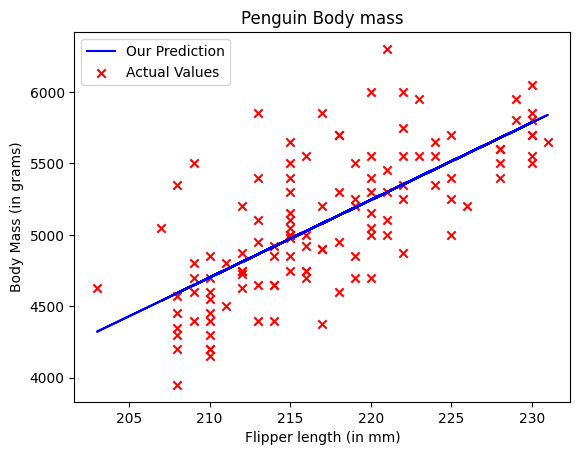

In [102]:
tmp_f_wb = compute_model_output(ols_data['flipper_length_mm'], slop, intercept)

# Plot our model prediction
pt.plot(ols_data['flipper_length_mm'], tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
pt.scatter(ols_data['flipper_length_mm'], ols_data['body_mass_g'], marker='x', c='r',label='Actual Values')

# Set the title
pt.title("Penguin Body mass")
# Set the y-axis label
pt.ylabel('Body Mass (in grams)')
# Set the x-axis label
pt.xlabel('Flipper length (in mm)')
pt.legend()
pt.show()

In [104]:
#Using OLS model:
X=ols_data['flipper_length_mm']
fitted_value=model.predict(X)

In [105]:
residual=model.resid

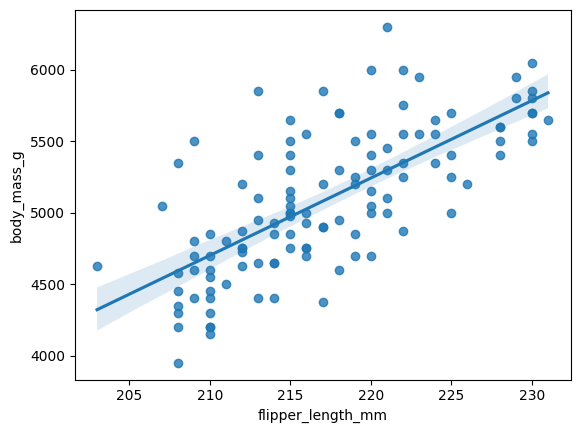

In [106]:
sns.regplot(x='flipper_length_mm',y='body_mass_g',data=ols_data)
pt.show()

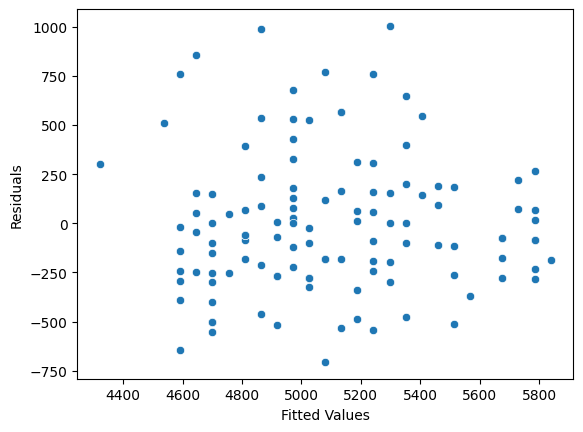

In [113]:
scatter=sns.scatterplot(data=ols_data, x=fitted_value, y=residual)

scatter.set_xlabel("Fitted Values")
scatter.set_ylabel("Residuals")
pt.show()

<Axes: >

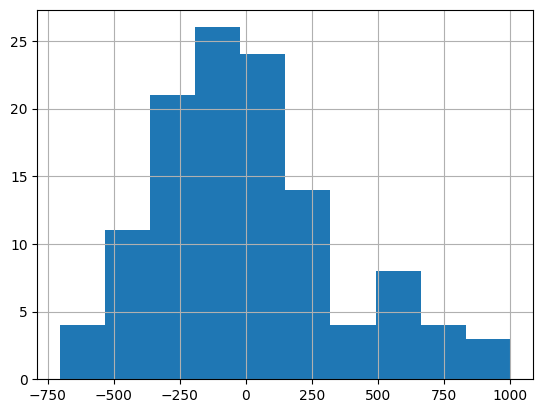

In [114]:
residual.hist()

- This histogram shows that the normality assumption in the data is observed

In [119]:
! pip3 install seaborn --upgrade

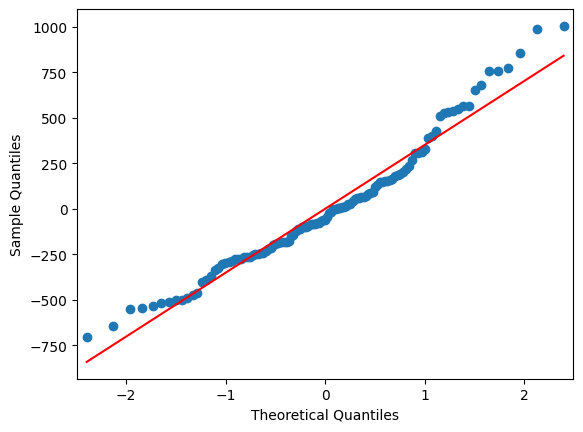

In [123]:
#QQ normality
import statsmodels.api as sm
import pylab as py
sm.qqplot(model.resid, line ='s')
py.show()

Few data points at the tails of the graph is outside the line